In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("train.csv")
data = np.array(data)

m,n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255


def InitParams():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1, b1, W2, b2
    

def ReLU(Z):
    return np.maximum(0,Z)

def Softmax(Z):
    max_Z = np.max(Z, axis=0, keepdims=True)
    exp_Z = np.exp(Z - max_Z)
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)


# def Softmax(Z):
#     return np.exp(Z) / np.sum(np.exp(Z))


def ForwardPropagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = Softmax(Z2)
    return Z1, A1, Z2, A2
    
def OneHot(Y):
    oneHotY = np.zeros((Y.size, Y.max() +1))
    oneHotY[np.arange(Y.size),Y] = 1
    oneHotY = oneHotY.T
    return oneHotY

def DerivReLU(Z):
    return Z>0

def BackPropagation(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    oneHotY = OneHot(Y)
    dZ2 = A2 - oneHotY
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * DerivReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2




    
# def BackPropagation(Z1, A1, Z2, A2, W2, X, Y):
#     m = Y.size
#     oneHotY = OneHot(Y)
#     dZ2 = A2 - oneHotY
#     dW2 = 1 / m*dZ2.dot(A1.T)
#     db2 = 1 / m*np.sum(dZ2, 2)
#     dZ1 = W2.T.dot(dZ2)*DerivReLU(Z1)
#     dW1 = 1 / m*dZ1.dot(X.T)
#     db1 = 1 / m*np.sum(dZ1, 2)
#     return dW1, db1, dW2, db2

def UpdateParams(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def GetPredictions(A2):
    return np.argmax(A2, 0)

def GetAccuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def GradientDescent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = InitParams()
    for i in range(iterations):
        Z1, A1, Z2, A2 = ForwardPropagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = BackPropagation(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = UpdateParams(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i%10 ==0:
            print("Iteration: ", i)
            print("Accuracy: ", GetAccuracy(GetPredictions(A2), Y))
    return W1, b1, W2, b2

W1, b1, W2, b2 = GradientDescent(X_train, Y_train, 500, 0.1)

def MakePrediction(X, W1, b1, W2, b2):
    _, _, _, A2 = ForwardPropagation(W1, b1, W2, b2, X)
    predictions = GetPredictions(A2)
    return predictions

def TestPrediction(index, W1, b1, W2, b2):
    currentImage = X_train[:, index, None]
    prediction = MakePrediction(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    currentImage = currentImage.reshape((28,28))*255
    plt.gray()
    plt.imshow(currentImage, interpolation='nearest')
    plt.show()
    


Iteration:  0
[3 0 0 ... 3 3 0] [2 4 6 ... 6 4 5]
Accuracy:  0.139
Iteration:  10
[4 4 2 ... 3 2 0] [2 4 6 ... 6 4 5]
Accuracy:  0.2876341463414634
Iteration:  20
[1 4 2 ... 3 2 0] [2 4 6 ... 6 4 5]
Accuracy:  0.3694390243902439
Iteration:  30
[1 4 2 ... 6 4 0] [2 4 6 ... 6 4 5]
Accuracy:  0.43646341463414634
Iteration:  40
[1 4 2 ... 6 4 0] [2 4 6 ... 6 4 5]
Accuracy:  0.49097560975609755
Iteration:  50
[1 4 2 ... 6 4 3] [2 4 6 ... 6 4 5]
Accuracy:  0.5379268292682927
Iteration:  60
[1 4 2 ... 6 4 3] [2 4 6 ... 6 4 5]
Accuracy:  0.5791463414634146
Iteration:  70
[1 4 6 ... 6 4 3] [2 4 6 ... 6 4 5]
Accuracy:  0.6151463414634146
Iteration:  80
[1 4 6 ... 6 4 3] [2 4 6 ... 6 4 5]
Accuracy:  0.6464878048780488
Iteration:  90
[1 4 6 ... 6 4 3] [2 4 6 ... 6 4 5]
Accuracy:  0.6745121951219513
Iteration:  100
[1 4 6 ... 6 4 3] [2 4 6 ... 6 4 5]
Accuracy:  0.6972682926829268
Iteration:  110
[1 4 6 ... 6 4 3] [2 4 6 ... 6 4 5]
Accuracy:  0.7152926829268292
Iteration:  120
[1 4 6 ... 6 4 3] [2 4

Prediction:  [8]
Label:  2


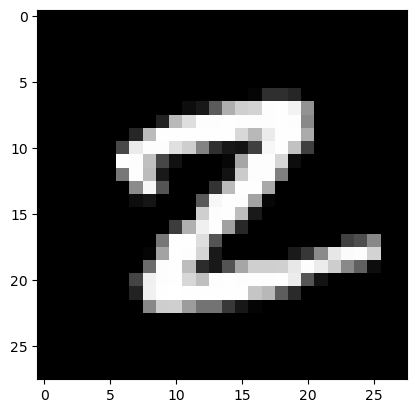

Prediction:  [4]
Label:  4


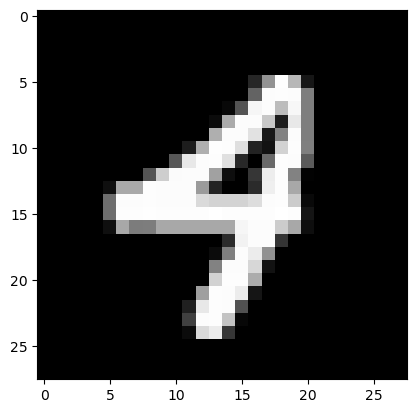

Prediction:  [6]
Label:  6


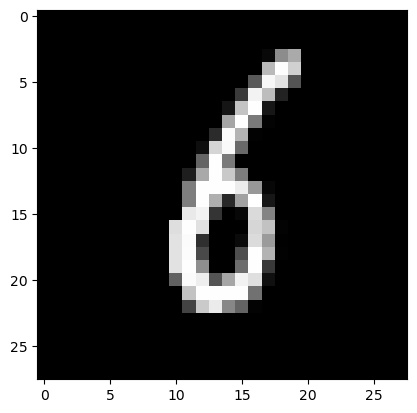

Prediction:  [0]
Label:  0


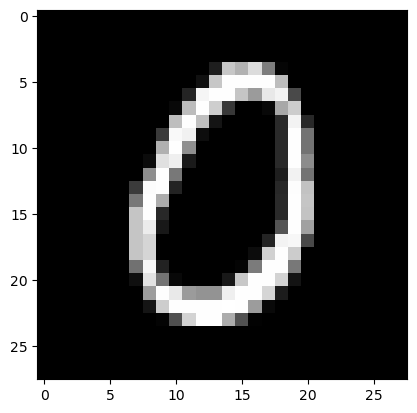

Prediction:  [4]
Label:  4


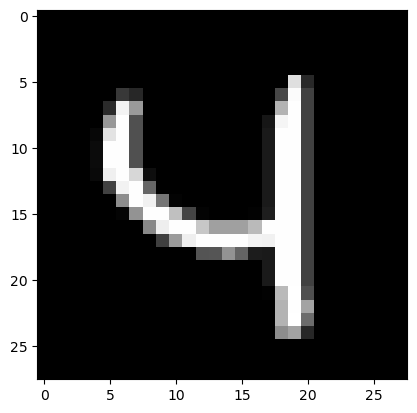

Prediction:  [7]
Label:  7


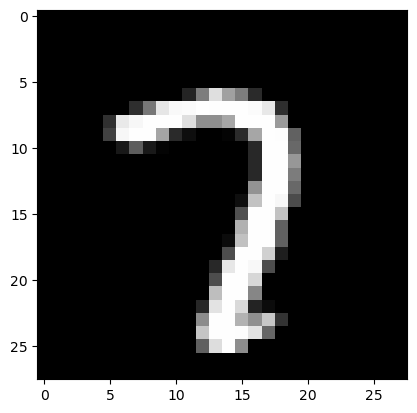

Prediction:  [3]
Label:  3


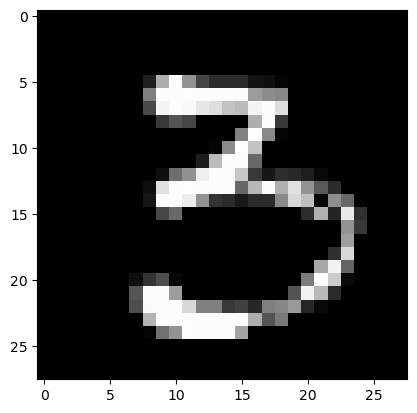

Prediction:  [0]
Label:  5


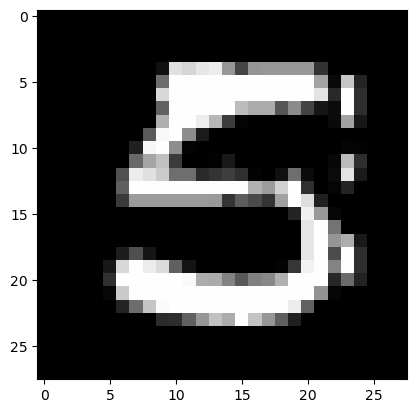

Prediction:  [6]
Label:  6


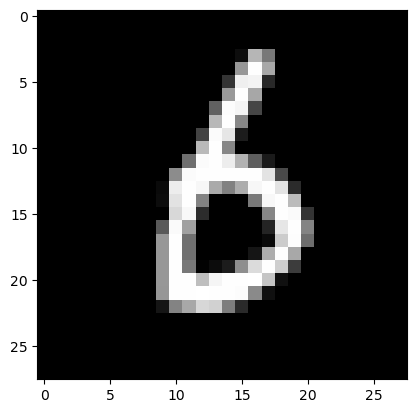

Prediction:  [0]
Label:  0


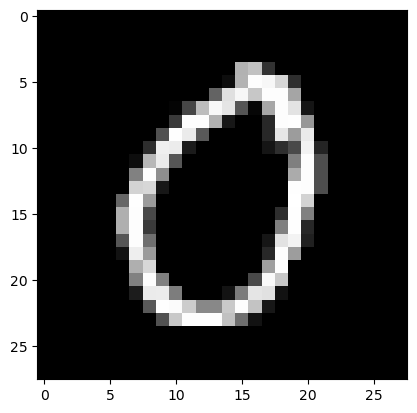

Prediction:  [7]
Label:  7


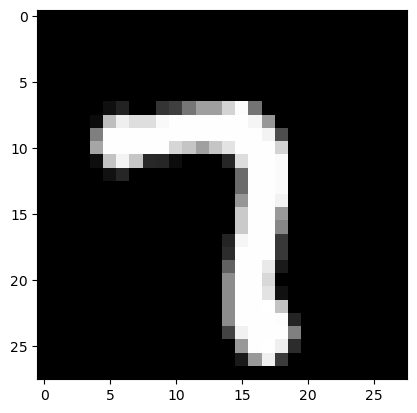

In [6]:
TestPrediction(0, W1, b1, W2, b2)
TestPrediction(1, W1, b1, W2, b2)
TestPrediction(2, W1, b1, W2, b2)
TestPrediction(3, W1, b1, W2, b2)
TestPrediction(4, W1, b1, W2, b2)
TestPrediction(6, W1, b1, W2, b2)
TestPrediction(7, W1, b1, W2, b2)
TestPrediction(8, W1, b1, W2, b2)
TestPrediction(9, W1, b1, W2, b2)
TestPrediction(10, W1, b1, W2, b2)
TestPrediction(11, W1, b1, W2, b2)
